Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Hegyi Gáspár András"
COLLABORATORS = ""

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transformations of Data and Exploratory Data Analysis - Continuation 
### (New Material from Section "Visualizing Data")

In this notebook we will try some methods for data transformation. Prior to transforming the data we must thoroughly explore the dataset. This process is often called **Exploratory Data Analysis**.



We will use a dataset from kaggle.com. Download the data [here](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/download) and put the downloaded ZIP-file `archive.zip` in the subdirectory `data` of the directory where this notebook is located. Pandas `read_csv()` function can open also compressed CSV-file.

In [4]:
data = pd.read_csv('data/archive.zip')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


The table contains information on real-estates in Melbourne, Australia. Let us look 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

At this moment we must find out what is in the data. Thr following is a quote from [the original](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) description posted by the author of the dataset 

>This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D. (Central Buisiness District). 

>….Now with extra data including including property size, land size and council area, you may need to change your code!

>Some Key Details
Suburb: Suburb

>Address: Address

>Rooms: Number of rooms

>Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

>Price: Price in Australian dollars

>Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

>SellerG: Real Estate Agent

>Date: Date sold

>Distance: Distance from CBD in Kilometres

Postcode> self explanatory

>Bedroom2 : Scraped # of Bedrooms (from different source)

>Bathroom: Number of Bathrooms

>Car: Number of carspots

>Landsize: Land Size in Metres

>BuildingArea: Building Size in Metres

>YearBuilt: Year the house was built

>CouncilArea: Governing council for the area

>Lattitude: Self explanitory

>Longtitude: Self explanitory

>Regionname: General Region (West, North West, North, North east …etc)

>Propertycount: Number of properties that exist in the suburb.

Let us display more samples from the dataset.


In [6]:
pd.set_option('display.max_columns',100)  # for showing more columns
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


## Visualizing Data

### Visualizing Geographical Data

We have geographical coordinates in our data. Let us plot them.

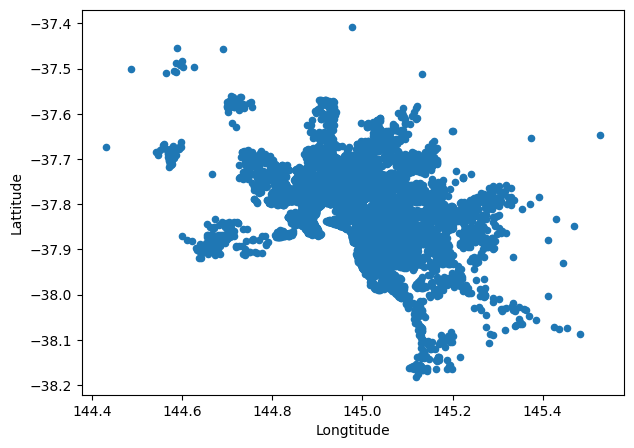

In [7]:
data.plot(kind='scatter', x="Longtitude", y="Lattitude",figsize=(7,5))
plt.show()

Improve the above plot by making the marks smaler (parameter `s`) and opaque (parameter `alpha`)

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

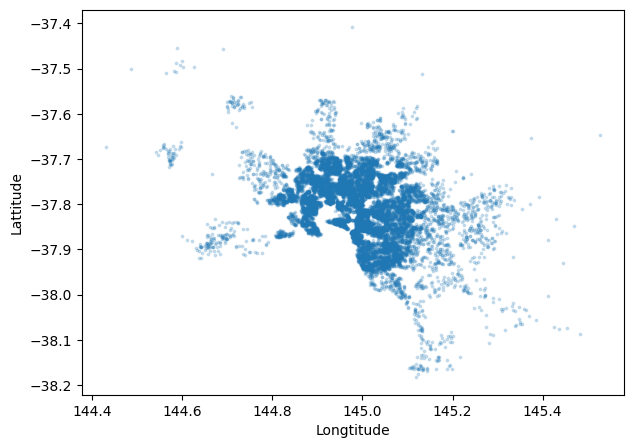

In [15]:
# YOUR CODE HERE
data.plot(kind='scatter', x="Longtitude", y="Lattitude",figsize=(7,5),s=3,alpha=0.2)

Now let us visually inspect distribution of prices by 
* making the size of marks proportional to `Propertycount` together with suitable legend (`label`)
* using color (parameter `c`proportional to the price of the property; you can use, e.g., colormap `jet`, which ranges from bluen (low values) to red (high prices)
* do not forget to add colorbar (parameter `colorbar`) showing the range of prices
* include legend
* add a title

Text(0.5, 1.0, 'The house prices by geographical data, and property count')

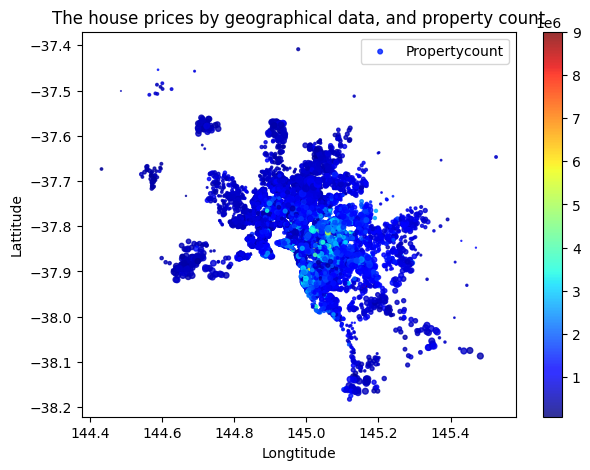

In [28]:
# YOUR CODE HERE
data.plot(label="Propertycount",kind='scatter', x="Longtitude", y="Lattitude",
          figsize=(7,5),s=data["Propertycount"]*0.001,alpha=0.8, c="Price",cmap="jet",legend=True)
plt.title("The house prices by geographical data, and property count")


Where are the properties with high price? Plot the properties with high price only.

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

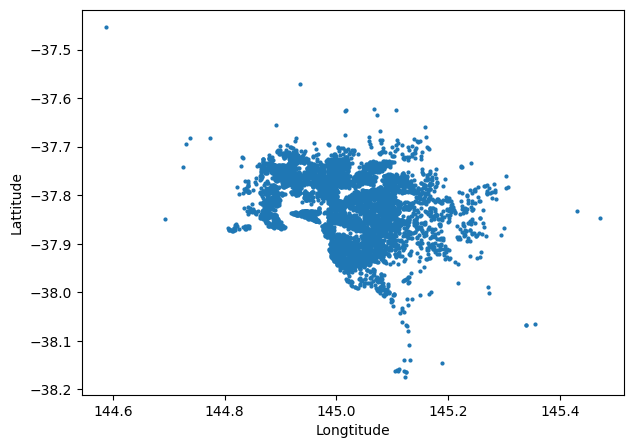

In [33]:
# YOUR CODE HERE
q3=data["Price"].quantile(0.75)
q1=data["Price"].quantile(0.25)
iqr=q3-q1

threshold_above = q3 + iqr*1.5

dataPrice=data[data["Price"]>data["Price"].median()]
dataPrice.plot(kind='scatter', x="Longtitude", y="Lattitude",figsize=(7,5),s=4,alpha=1)

For selected attributes, we can inspect their pairwise dependencies using `scatter_matrix()` function of `pandas`. 

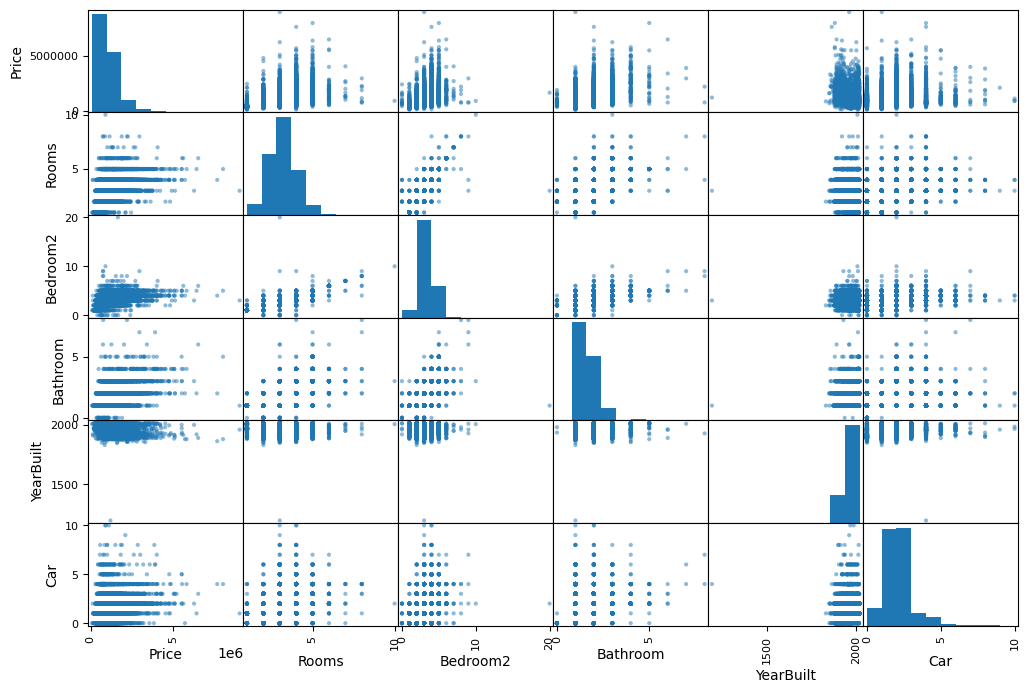

In [34]:
attributes = ["Price", "Rooms", "Bedroom2", "Bathroom", "YearBuilt", "Car"]
_ = pd.plotting.scatter_matrix(data[attributes], figsize=(12,8))

Looking at the scatterplots, it is evident that the value of `YearBuilt` has outliers. Let us correct them and plot the scatter plot again. 

In [35]:
data1 = data.copy()
data1.loc[data1["YearBuilt"] < 1850,"YearBuilt"] = 1850

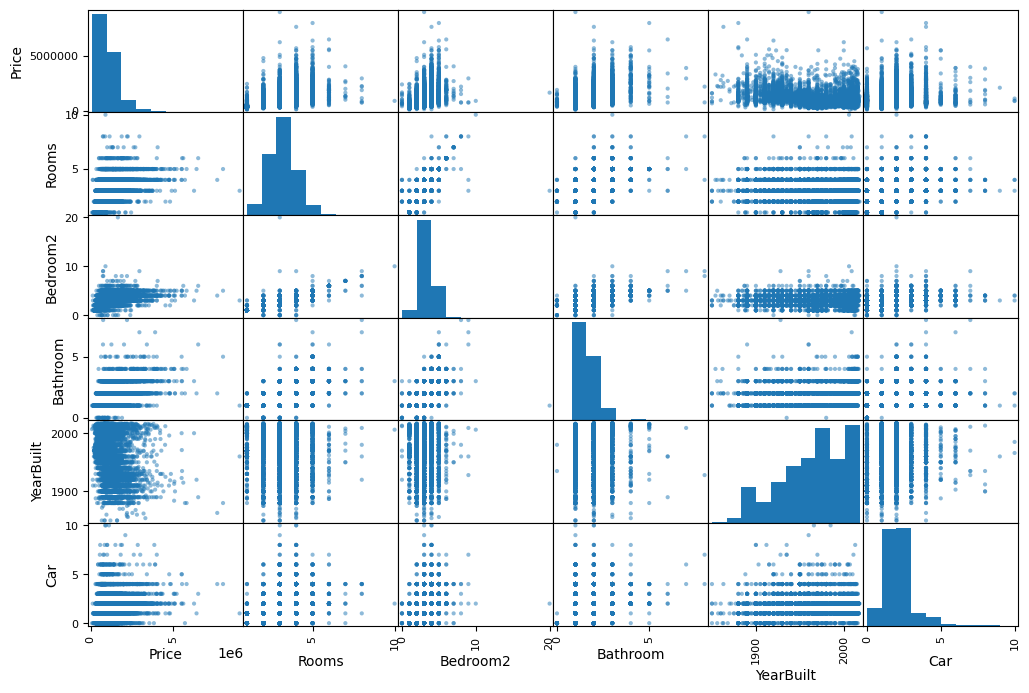

In [36]:
attributes = ["Price", "Rooms", "Bedroom2", "Bathroom", "YearBuilt","Car"]
_ = pd.plotting.scatter_matrix(data1[attributes], figsize=(12,8))

In [37]:
data1["MeanBedrooms"] =(data1["Rooms"] + data1["Bedroom2"])/2

In [38]:
corr1 = data1.corr()

ValueError: could not convert string to float: 'Abbotsford'

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
data1["AllRooms"] =(data1["Rooms"] + data1["Bedroom2"]+2*data1["Bathroom"])/2
corr1 = data1.corr()

In [ ]:
print(corr1["Price"].sort_values(ascending=False,key=lambda col: col.abs()))


# Preparing Data for Mining

Instead of doing that manually, we should implement a function for that. Why\/

1. Easy to reproduce on any dataset.
2. Reusability
3. A possibility to build combinations of transformations.

In our example the target attribute is `Price`. We should split the input attributes and the target labels. Note that we start from the original `data` again.

In [ ]:
real_estate = data.drop("Price",axis=1)
real_estate_price = data["Price"].copy()

# Data Cleaning

Several attribtes have missing data. Compute the lst containing the names of all attributes that have at least one missing value.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

We can fill the missing values using `pandas` method `fillna()`, but let us do that using `scikit-learn`. The library has a class `SimpleImputer` that can fill missing numeric data by supplying mean, median, most frequent or constant value.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

real_estate_num = real_estate.drop(columns=["Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname"],axis=1)
imputer.fit(real_estate_num)

In [ ]:
imputer.statistics_

In [ ]:
real_estate_num1 = imputer.transform(real_estate_num)

`real_estate_num1` is a `numpy` array. We can convert it back into a `pandas` `DataFrame`.

In [ ]:
real_estate_num1_df = pd.DataFrame(real_estate_num1, index=real_estate_num.index)

# Scikit-learn design Principles

* **Consistency:** all objects (classes) share a simple interface
  - *Estimator:* 
    * `fit()` - one (or two, for superwised learning) input **2D**-array; estimates some parameters based on supplied data
    * other parameters are instance variables, usually set in constructor; serve as hyepr-parameters

  - *Transformer:* 
    * an estimator that can transform data
    * `fit()`
    * `transform()`
    * `fit_transform()` - a combination of `fit()` and `transform()`; can be obtained by inherting from `TransformerMixin`

  - *Predictor:* 
    * estimator capable to predict
    * `fit()`
    * `predict()`
    * `score()` - computed after prediction - the quality of the prediction

* **Inspection:** 
  - all hyperparameters are accessible via public instance variables (e.g., `imputer.startegy`)
  - estimated (learned) parameters are accessible as instance variables ending with the underscore character 
    (e.g., `imputer.statistics_`)

* **Nonproliferation of classes:**
  - Datasets are represented as NumPy arrays or SciPy sparse matrices
  - Hyperparameters are just regular Python strings or numbers.

* **Composition:**
  - reusing buiding blocks; e.g., `Pipeline` estimator can be build as a sequence of transformers followed one estimator

* **Sensible defaults:**
  - most parameters have reasonable default values
  



**Tasks:**

* convert `Method` into categorial attribute and encode it using `OneHotEncoder` - implement this as a transformer class using `Pipeline`

* using [ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html), implement preprocessing numeric features and categorial features with few numbers of categories; other features as `Date` should be preserved

* numeric features have very different ranges - scale them!

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import CategoricalEncoder
from sklearn.pipeline import Pipeline

cat_to_1hot_pipe = Pipeline(steps=[("categorize", CategoricalEncoder()), ("to_1hot", OneHotEncoder)])
    
Method_1hot = cat_to_1hot.fit_transform(housing_cat_encoded.reshape(-1,1))

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = real_estate.values.reshape(-1, 1)
real_estate = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

In [ ]:
from sklearn.preprocessing import CategoricalEncoder 
cat_encoder = CategoricalEncoder()

method_cat = real_estate["Method"].astype("category")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Method_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [ ]:
real_estate["Method"].astype("category").cat.codes

In [ ]:
pd.get_dummies(real_estate["Method"])

In [ ]:
oh = OneHotEncoder()
oh.fit_transform(real_estate["Method"].reshape(-1,1))

In [ ]:
column_trans = ColumnTransformer(
     [('categories', OneHotEncoder(dtype='int'), ['city']),
      ('title_bow', CountVectorizer(), 'title')],
     remainder='drop', verbose_feature_names_out=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67f1cf2b-c97a-47ed-8e26-a1e69c13c9c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>